# 03. 장고(Django)로 웹 API 만들기

## 장고를 사용해서 웹 API 만들기
- `pip install django djangorestframework django-filter djangorestframework-filters`

### 장고 프로젝트 만들기
- `django-admin startproject django_film_api`
- `cd django_film_api`
- `python manage.py startapp film`

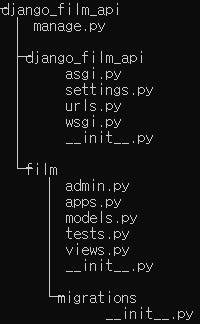

### 장고 ORM 모델 정의하기
- 실제 데이터베이스의 내용을 기반으로 데이터베이스를 자동으로 생성
- `python manage.py inspectdb`

### models.py의 내용 변경하기
- `django_film_api/film/models.py`
    - class Meta 부분의 `managed = False`를 통해 migration을 실행하더라도 실제 데이터베이스에 테이블이 만들어지지 않음

```python
from django.db import models


class Language(models.Model):
    """language 테이블 전용 모델"""
    language_id = models.AutoField(primary_key=True)
    name = models.CharField(max_length=20)
    last_update = models.DateTimeField()
    
    def __str__(self):
        return '%s %s' % (self.language_id, self.name)
    
    class Meta:
        managed = False
        db_table = 'language'
        
        
class Film(models.Model):
    """film 테이블 전용 모델"""
    film_id = models.SmallIntegerField(primary_key=True)
    title = models.CharField(max_length=255)
    description = models.TextField(blank=True, null=True)
    release_year = models.PositiveSmallIntegerField(blank=True, null=True)
    language = models.ForeignKey('Language', models.DO_NOTHING)
    length = models.SmallIntegerField(blank=True, null=True)
    last_update = models.DateTimeField()
    
    class Meta:
        managed = False
        db_table = 'film'
```

### settings.py의 내용 변경하기
- `django_film_api/django_film_api/settings.py`

1. 웹 애플리케이션을 호스트할 머신의 호스트 이름, \*을 지정하면 아무것이나 괜찮다는 의미

```python
ALLOWED_HOSTS = ['*']
```

2. 장고 REST 프레임워크와 요청 필터 기능을 사용할 수 있게 활성화 및 film 애플리케이션 활성화

```python
INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',

    'rest_framework',
    'django_filters',
    
    'film',
    
]
```

3. REST 프레임워크의 설정

```python
REST_FRAMEWORK = {
    'DEFAULT_FILTER_BACKENDS': (
            'rest_framework.filters.SearchFilter',
            'rest_framework.filters.OrderingFilter',
    ),
    'PAGE_SIZE':10
}
```

4. MySQL 연결

```python
DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.mysql',
        'HOST':'localhost',
        'NAME':'sakila',
        'USER':'root',
        'PASSWORD':'3756',
    }
}
```

## film 테이블에서 아이템 추출하기

### 인터렉티브 셀에서 데이터베이스 내용 확인하기
- 장고 환경이 아닌 인터렉티브 셸을 사용해서 확인
- `ImportError: cannot import name 'QUERY_TERMS' from 'django.db.models.sql.constants'` 오류 때문에 더 이상 진행이 안 된다...
    - 장고와 장고 필터 버전 차이 때문인 것 같은데 책에서 어떤 버전을 썼는지 확인이 안 되기 때문에 여기서 끝..